In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats

In [4]:
%store -r song_data
song, fs = song_data

In [5]:
np.mean(abs(song))

0.10483469

In [6]:
n = 10
mean = np.mean(abs(song))
esong = np.concatenate((mean*np.ones(n//2), song, mean*np.ones(n//2)))
esong = np.concatenate((esong, mean*np.ones(n - (len(esong) % n))))
len(esong)

2309610

In [7]:
seg = esong.reshape(-1, n)
seg.shape

(230961, 10)

In [8]:
meds = np.median(seg, axis=1)
meds.shape

(230961,)

In [9]:
mads = stats.median_abs_deviation(seg, axis=1)
mads.shape

(230961,)

In [10]:
ovlp = np.lib.stride_tricks.sliding_window_view(esong, [n])
ovlp.shape, esong.shape

((2309601, 10), (2309610,))

In [39]:
def median_smoothing(arr, n):
    med_x = np.median(arr)
    med_dev = sp.stats.median_abs_deviation(arr)
    x = np.concatenate((med_x*np.ones(n//2), arr, med_x*np.ones(n//2)))
    x_win = np.lib.stride_tricks.sliding_window_view(x, n)
    meds = np.mean(x_win, axis=1) + med_dev
    
    return np.where(arr > meds[:-1], arr, 0)

In [42]:
med = median_smoothing(song**2, 10000)

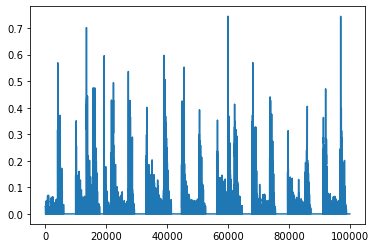

In [43]:
plt.plot(med[1000000:1100000])